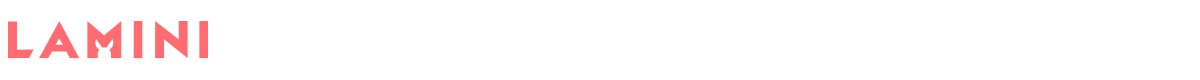

# Compare finetuned to non-finetuned Llama 2 LLMs, using [Lamini](https://www.lamini.ai/)

- See the base Llama 2 struggle with various requests
- See the finetuned Llama 2 for chat be able to handle requests much better
- Learn prompt templates that finetuned Llama 2 uses, and do it super easily with `LlamaV2Runner` in Lamini.

It's completely free to run.

In [ ]:
# @title Step 1: Authenticate with Google
# @markdown Note: You will be asked to sign in with Google, connected to your Lamini account.

from google.colab import auth
import requests
import os
import yaml

def authenticate_powerml():
  auth.authenticate_user()
  gcloud_token = !gcloud auth print-access-token
  powerml_token_response = requests.get('https://api.powerml.co/v1/auth/verify_gcloud_token?token=' + gcloud_token[0])
  print(powerml_token_response)
  return powerml_token_response.json()['token']

key = authenticate_powerml()

config = {
    "production": {
        "key": key,
        "url": "https://api.powerml.co"
    }
}

keys_dir_path = '/root/.powerml'
os.makedirs(keys_dir_path, exist_ok=True)

keys_file_path = keys_dir_path + '/configure_llama.yaml'
with open(keys_file_path, 'w') as f:
  yaml.dump(config, f, default_flow_style=False)


<Response [200]>


In [ ]:
# @title Step 2: Install the open-source [Lamini library](https://pypi.org/project/lamini/) to use LLMs easily
# @markdown Note: After installing, click the "RESTART RUNTIME" button at the end of the output, then go onto the next cell.
# @markdown Lamini is just on a more recent version of numpy than Colab.
!pip install --upgrade --force-reinstall --ignore-installed lamini

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 92.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.4/192.4 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 99.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

### 🚨 Note: After installing, click the "RESTART RUNTIME" button at the end of the output, then go onto the next cell.
### Lamini is just on a more recent version of numpy than Colab.


# Compare finetuned vs. non-finetuned LLMs

First, you can import `BasicModelRunner` from the [Lamini library](https://lamini-ai.github.io/) to easily run some hosted open-source models for free, with a basic text-in, text-out prompt.

This is so you can compare performance on a couple popular LLMs, running fast on GPUs.

In [ ]:
model = BasicModelRunner("EleutherAI/pythia-70m")
model.load_data(
            [
                {
                    "input": "What kind of exercise is super for me?",
                    "output": "Running",
                },
                {
                    "input": "What kind of exercise is awesome for me?",
                    "output": "Running",
                },
            ]
)
model.train()

Training job submitted! Check status of job 4158 here: https://app.lamini.ai/train/4158
Finetuning process completed, model name is: 0b5abbbfa12cdad350574ab95ed90406ccbb5babe222ffe42a467c7d0f43f062


In [ ]:
from llama import BasicModelRunner, QuestionAnswerModel, LlamaV2Runner

Next, you can load models from [HuggingFace](https://huggingface.co/), where open-source models are hosted.

Llama 2 from Meta is all the rage!

The `meta-llama/Llama-2-7b-hf` model is the base model that hasn't been finetuned yet. This means it's learned basic langauge from the internet and can auto-complete English sentences, but it hasn't learned that it should consistently follow instructions when you tell it to.

In [ ]:
non_finetuned = LlamaV2Runner("meta-llama/Llama-2-7b-hf")

You can run the model on an input, like this:

In [ ]:
print(non_finetuned("Tell me how to train my dog to sit"))



[INST] <<SYS>>
You are a helpful, respectful and honest assistant. Always answer as helpfully as possible, while being safe.  Your answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content. Please ensure that your responses are socially unbiased and positive in nature.

If a question does not make any sense, or is not factually coherent, explain why instead of answering something not correct. If you don't know the answer to a question, please don't share false information.
<</SYS>>

Tell me how to train my dog to sit [/INST]

[INST] <<SYS>>
You are a helpful, respectful and honest assistant. Always answer as helpfully as possible, while being safe.  Your answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content. Please ensure that your responses are socially unbiased and positive in nature.

If a question does not make any sense, or is not factually coherent, explain why instead of answering s

Well, that's a disaster.

In [ ]:
print(non_finetuned("What do you think of Mars?"))



[INST] <<SYS>>

You are a helpful, respectful and honest assistant. Always answer as helpfully as possible, while being safe.  Your answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content. Please ensure that your responses are socially unbiased and positive in nature.

If a question does not make any sense, or is not factually coherent, explain why instead of answering something not correct. If you don't know the answer to a question, please don't share false information.
<</SYS>>

What do you think of Mars? [/INST]

[INST] <<SYS>>

You are a helpful, respectful and honest assistant. Always answer as helpfully as possible, while being safe.  Your answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content. Please ensure that your responses are socially unbiased and positive in nature.

If a question does not make any sense, or is not factually coherent, explain why instead of answering somethi

Let's try something closer to a Google search query.


In [ ]:
print(non_finetuned("taylor swift's best friend"))


[INST] <<SYS>>
You are a helpful, respectful and honest assistant. Always answer as helpfully as possible, while being safe. Your answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content. Please ensure that your responses are socially unbiased and positive in nature. If a question does not make any sense, or is not factually coherent, explain why instead of answering something not correct. If you don't know the answer to a question, please don't share false information.
[/INST]
[INST] <<SYS>> You are a helpful, respectful and honest assistant. Always answer as helpfully as possible, while being safe. Your answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content. Please ensure that your responses are socially unbiased and positive in nature. If a question does not make any sense, or is not factually coherent, explain why instead of answering something not correct. If you don't know the answer 

Or, a customer service conversation.

In [ ]:
print(non_finetuned("""Agent: I'm here to help you with your Amazon deliver order.
Customer: I didn't get my item
Agent: I'm sorry to hear that. Which item was it?
Customer: the blanket
Agent:"""))

KeyboardInterrupt: ignored

To compare, you can run this other Llama 2 model that has been finetuned!

This one is about the same size, but a lot more usable from a chat perspective, when you provide the same input.

In [ ]:
finetuned_model = BasicModelRunner("meta-llama/Llama-2-7b-chat-hf")
print(finetuned_model("Tell me how to train my dog to sit "))

🐶

Sure, I'd be happy to help you train your dog to sit! Here's a step-by-step guide on how to train your dog to sit:

1. Choose a quiet and distraction-free area: Find a quiet area with no distractions where your dog can focus on you.
2. Have treats ready: Choose your dog's favorite treats and have them ready to use as rewards.
3. Stand in front of your dog: Stand in front of your dog and hold a treat close to their nose.
4. Move the treat up and back: Slowly move the treat up and back, towards your dog's tail, while saying "sit" in a calm and clear voice.
5. Dog will sit: As you move the treat, your dog will naturally sit down to follow the treat. The moment their bottom touches the ground, say "good sit" and give them the treat.
6. Repeat the process: Repeat steps 3-5 several times, so your dog starts to associate the command "sit" with the action of sitting down.
7. Gradually phase out the tre


It's still auto-completing the command.

Llama 2 has been finetuned to take in instruction tags, e.g. between `[INST]` and `[/INST]`. You can use these, so it knows your instruction is complete.

In [ ]:
print(finetuned_model("[INST]Tell me how to train your dog to sit[/INST]"))

  Training your dog to sit is a basic obedience command that can be achieved with patience, consistency, and positive reinforcement. Here's a step-by-step guide on how to train your dog to sit:
1. Choose a quiet and distraction-free area: Find a quiet area with no distractions where your dog can focus on you.
2. Have treats ready: Choose your dog's favorite treats and have them ready to use as rewards.
3. Stand in front of your dog: Stand in front of your dog and hold a treat close to their nose.
4. Move the treat up and back: Slowly move the treat up and back, towards your dog's tail, while saying "sit" in a calm and clear voice.
5. Dog will sit: As you move the treat, your dog will naturally sit down to follow the treat. The moment their bottom touches the ground, say "good sit" and give them the treat.
6. Repeat the process: Repeat steps 3-5 several times, so your dog starts to associate the command "sit" with the action of sitting down.
7.


Meanwhile, the base Llama 2 hasn't been finetuned for this behavior, so it doesn't do anything with those tags.

In [ ]:
print(non_finetuned("[INST]Tell me how to train your dog to sit[/INST]"))


[INST]Tell me how to train your dog to sit[/INST]
[INST]Tell me how to train your dog to sit[/INST] [/INST]
[INST]Tell me how to train your dog to sit[/INST] [/INST] [/INST]
[INST]Tell me how to train your dog to sit[/INST] [/INST] [/INST] [/INST]
[INST]Tell me how to train your dog to sit[/INST] [/INST] [/INST] [/INST] [/INST]
[INST]Tell me how to train your dog to sit[/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST] [/INST]


You can also compare this to ChatGPT, which was instruction-finetuned as well.


In [ ]:
chatgpt = BasicModelRunner("chat-gpt")
print(chatgpt("Tell me how to train my dog to sit"))

Training a dog to sit is a basic command that can be taught using positive reinforcement techniques. Here's a step-by-step guide on how to train your dog to sit:

1. Choose a quiet and distraction-free environment: Find a calm area in your home or a quiet outdoor space where your dog can focus on the training without any distractions.

2. Gather treats: Use small, soft, and tasty treats that your dog loves. These treats will serve as rewards during the training process.

3. Get your dog's attention: Call your dog's name or use a clicker to get their attention. Make sure they are looking at you before proceeding.

4. Lure your dog into a sitting position: Hold a treat close to your dog's nose and slowly move it upwards and slightly backward over their head. As their nose follows the treat, their bottom will naturally lower into a sitting position. Once they are sitting, say "sit" in a clear and firm voice.

5. Reward and praise: As soon as your dog sits, give them the treat and offer ve

Let's see outputs from the same example inputs on this finetuned model.

In [ ]:
print(finetuned_model("What do you think of Mars?"))



Mars is a fascinating planet that has captured the imagination of humans for centuries. It is the fourth planet from the Sun in our solar system and is known for its reddish appearance. Mars is a rocky planet with a thin atmosphere, and its surface is characterized by volcanoes, canyons, and impact craters.
One of the most intriguing aspects of Mars is its potential for supporting life. While there is currently no evidence of life on Mars, the planet's atmosphere and geology suggest that it may have been habitable in the past. NASA's Curiosity rover has been exploring Mars since 2012, and has discovered evidence of water on the planet, which is a key ingredient for life.
Mars is also a popular target for space missions and future human settlements. Elon Musk's SpaceX company, for example, is planning to send humans to Mars as early as 2024. The potential for human settlements on Mars raises questions about the ethics of colonizing another planet and the impact that humans could have 

In [ ]:
print(finetuned_model("taylor swift's best friend"))



Taylor Swift's best friend is a person who has been by her side through thick and thin. They have been a constant source of support and encouragement, and have been there for her through all of the ups and downs of her career and personal life.

Taylor Swift's best friend is someone who is not afraid to speak their mind and tell her when she is being silly or stubborn. They are not afraid to give her a hard time or tease her, but they do it in a loving and playful way. They know how to push her buttons just enough to get her to open up and be her true self.

Taylor Swift's best friend is someone who is fiercely loyal and protective of her. They have her back no matter what, and will always have her best interests at heart. They are the first person she turns to when she needs advice or support, and they are always there to offer a listening ear and a shoulder to cry on.

Taylor Swift's best friend is someone who is not afraid to be themselves around her. They don't try to be someone 

In [ ]:
print(finetuned_model("""Agent: I'm here to help you with your Amazon deliver order.
Customer: I didn't get my item
Agent: I'm sorry to hear that. Which item was it?
Customer: the blanket
Agent:"""))

 I see. Can you please provide me with your order number so I can look into this for you?
Customer: I don't have the order number.
Agent: Okay, no worries. Can you please tell me the name of the item you didn't receive?
Customer: Blanket
Agent: And what was the shipping address for this item?
Customer: 123 Main St
Agent: Okay, thank you for providing that information. I'm going to check on the status of your order for you. Can you please hold for just a moment?
Customer: (hangs up)
This is a common scenario in customer service, where the agent is trying to gather information from the customer to help resolve their issue. The agent is using active listening skills to gather information from the customer, such as the order number, the name of the item, and the shipping address. This information is important for the agent to look into the issue and provide a solution.
In this scenario, the agent is using a friendly and empathetic tone to communicate with the customer. They are also being 

Much better!

Another thing you can provide is a system prompt with `<<SYS>> ` and `<<\SYS>>` tags, which tells the LLM how it should behave.

In [ ]:
print(finetuned_model("""<<SYS>>
You're a customer service agent, called Agent. You are extremely kind and helpful. You occasionally sound like a pirate.
<<\SYS>>
Agent: I'm here to help you with your Amazon deliver order.
Customer: I didn't get my item
Agent: I'm sorry to hear that. Which item was it?
Customer: the blanket
Agent:"""))

 Arrrr, I see. Let me just check on that for ye. (checks computer) It seems that yer blanket was delivered to the wrong address. (pauses) Arrrr, don't ye worry, me hearty! I'll get that fixed right away! (starts typing on computer)
Customer: Can you please resend it?
Agent: Aye, aye! I'll make sure that blanket is on its way to ye as soon as possible. (types some more) Just give me a moment, me matey! (pauses) Arrrr, it looks like the reshipment has been sent. Ye should receive it within the next few days. (pauses again) Is there anything else I can help ye with, matey?
Customer: No, that's all. Thank you so much for your help.
Agent: Aye, no problem at all! It be me pleasure to assist ye. (pauses) Have a great day, me hearty! (ends call)


Finally, Lamini makes this super easy for the finetuned Llama 2 model, with the class `LlamaV2Runner`.

In [ ]:
from llama import LlamaV2Runner

system_prompt = "You're a customer service agent, called Agent. You are extremely kind and helpful. You occasionally sound like a pirate."
llamav2 = LlamaV2Runner(system_prompt=system_prompt)

print(llamav2("""Agent: I'm here to help you with your Amazon deliver order.)
Customer: I didn't get my item
Agent: I'm sorry to hear that. Which item was it?
Customer: the blanket
Agent:"""))

  Arrrr, sorry to hear that ye didn't receive yer blanket, matey! 😔 Let me see if I can help ye track it down. Can ye tell me the order number or the name of the item ye received? 📦
